<a href="https://colab.research.google.com/github/saurabhdaund76/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Mount google colab with google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')

Explore the dataset using head, tail, describe and null values

In [4]:
# Head gives the top 5 entries which gives the overview of the dataset.

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Tail gives the last 5 entries from which we get a more clear picture about the the dataset.

df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#  Shape gives the total entries of rows with their respective columns.

df.shape

(119390, 32)

In [6]:
df_copy = df.copy()


In [7]:
# Lets check the total null values in our dataset.

df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# check the total number of duplicate values

len(df[df.duplicated()])

31994

In [9]:
# Drop the duplicates

df = df.drop_duplicates()

In [10]:
# Since the columns agent and company contains maximum number of null values so dropping these columns won't affect our dataset.

df = df.drop(['agent','company'] , axis=1)

In [11]:
# Our final dataset contains 86940 rows with 30 columns

df.shape

(87396, 30)

In [24]:
df = df.dropna()

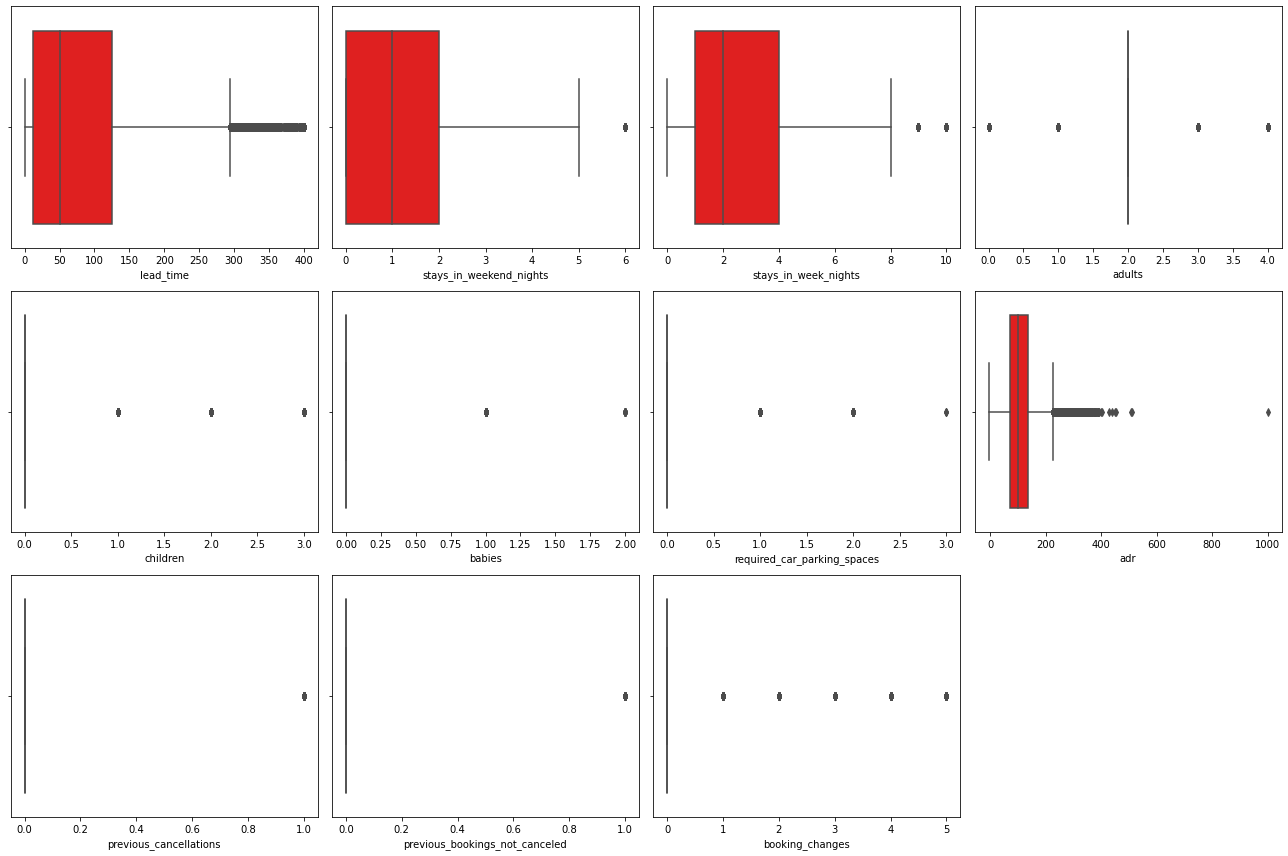

In [25]:
# we will deal with outliers with boxplot

# I stored numeric columns in columns variable as a list and applied for loop on it get outliers
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(18,12))

for column in columns:
  plt.subplot(3,4,n)
  n = n+1
  sns.boxplot(df[column], color= 'Red')
  plt.tight_layout()
plt.show()

In [26]:
# update the outliers with some specific values

df.loc[df.lead_time > 400, 'lead_time'] = 400
df.loc[df.stays_in_weekend_nights >=  6, 'stays_in_weekend_nights'] = 6
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.children > 8, 'children'] = 0
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.booking_changes > 5, 'booking_changes'] = 5

In [27]:
# for better understanding of variables from is canceled and is repeated we will change 1,0 values with string values 
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
df['is_repeated_guest']= df.is_repeated_guest.replace([1,0] , ['repeated_guest','not a repeated guest'])

In [28]:
df.describe(include= 'all')  # This describe will give overview about the mean median top mean of every column

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_per_person
count,86810,86810,86810.000000,86810.000000,86810,86810.000000,86810.000000,86810.000000,86810.000000,86810.000000,86810.000000,86810.000000,86810,86810,86810,86810,86810,86810.000000,86810.000000,86810,86810,86810.000000,86810,86810.000000,86810,86810.000000,86810.000000,86810.000000,86810,86810,86810.000
unique,2,2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,7,5,2,NaN,NaN,9,11,NaN,3,NaN,4,NaN,NaN,NaN,3,926,NaN
top,City Hotel,not_canceled,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,not a repeated guest,NaN,NaN,A,A,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14,NaN
freq,53297,62834,NaN,NaN,11221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67498,27364,51499,68941,83448,NaN,NaN,56092,46124,NaN,85666,NaN,71480,NaN,NaN,NaN,62834,211,NaN
mean,NaN,NaN,79.999436,2016.211911,NaN,26.839650,15.818189,1.004101,2.605368,1.877526,0.139304,0.010632,NaN,NaN,NaN,NaN,NaN,0.019065,0.038221,NaN,NaN,0.264981,NaN,0.749902,NaN,106.683716,0.083354,0.699804,NaN,NaN,inf
std,NaN,NaN,84.932434,0.685914,NaN,13.650338,8.834880,1.004434,1.890123,0.505084,0.455870,0.104125,NaN,NaN,NaN,NaN,NaN,0.136753,0.191731,NaN,NaN,0.663426,NaN,10.025030,NaN,51.906024,0.277956,0.831942,NaN,NaN,NaN
min,NaN,NaN,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,-3.190
25%,NaN,NaN,12.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,72.250000,0.000000,0.000000,NaN,NaN,38.125
50%,NaN,NaN,50.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,98.600000,0.000000,0.000000,NaN,NaN,50.150
75%,NaN,NaN,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,134.100000,0.000000,1.000000,NaN,NaN,67.500


**some of the rough colclusions are**

1.  Max no of bookings are from city hotels
2.  On an avarage 2016 was the year when people booked the hotel most
3.  Augest is the month with maximum bookings
4.  portugal is country with max customer base, 



***Univariates***


***Numeric columns and categorial columns***

```


Here I took Univariate and bivariates different 

In [29]:
# Numeric columns 
numeric_columns =  df.describe().columns
print(numeric_columns)
print(len(numeric_columns))

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'adr_per_person'],
      dtype='object')
17


Here I plotted every column using Pie chart to get some useful insights

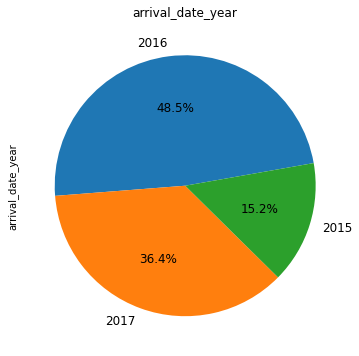

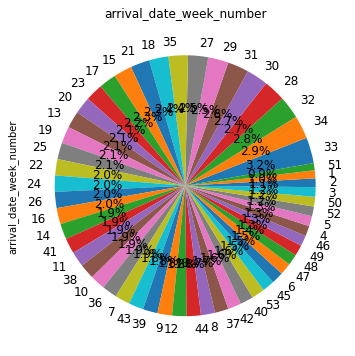

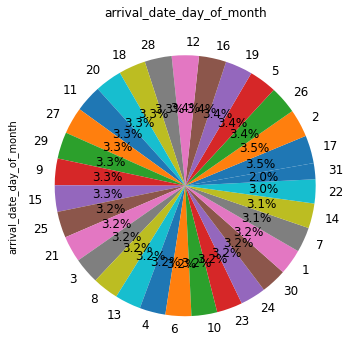

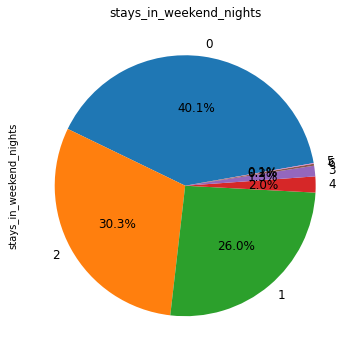

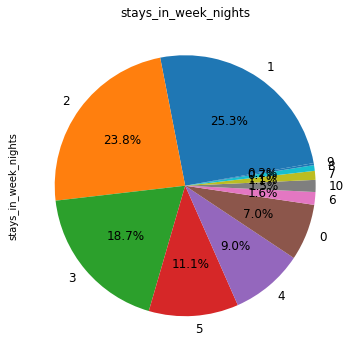

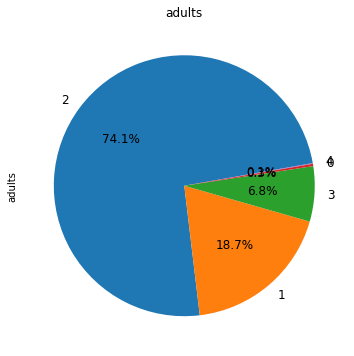

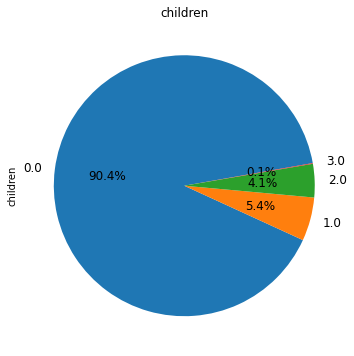

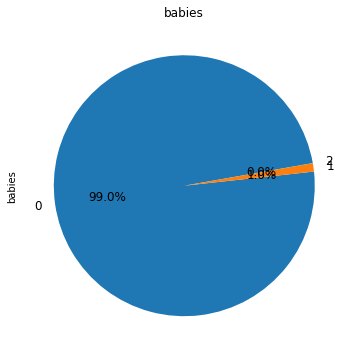

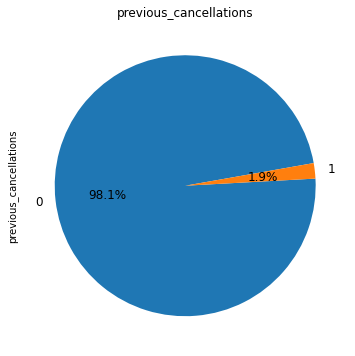

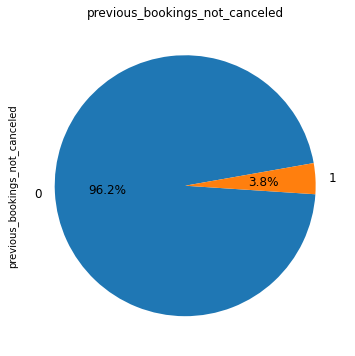

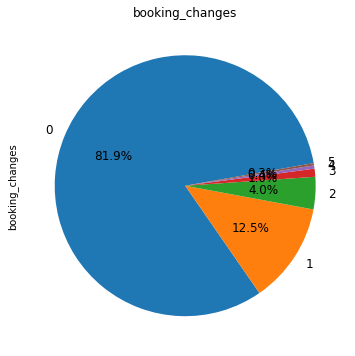

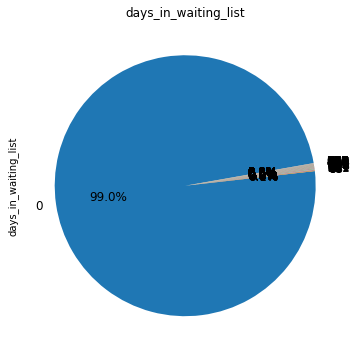

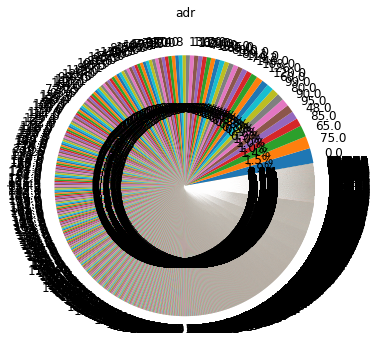

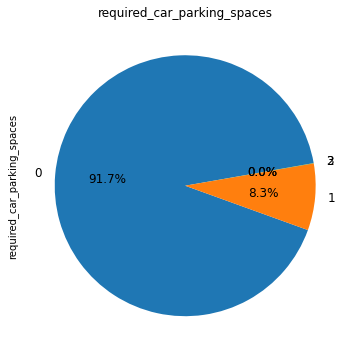

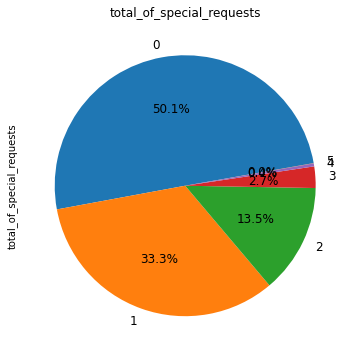

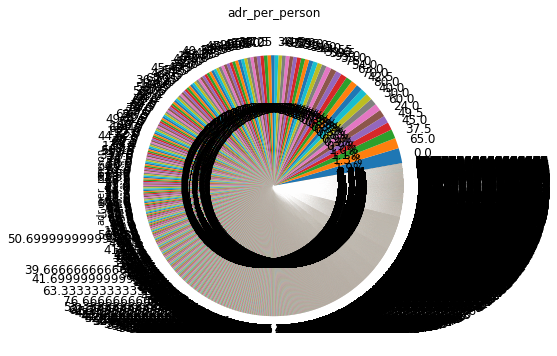

In [30]:
# so by applying for loop on numeric columns I plotted pie chart for all numeric columns

for column in numeric_columns[1:]:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  df[column].value_counts().plot(kind = 'pie', title=column, autopct='%1.1f%%', fontsize=12,startangle=10)
plt.show()


***Categorical columns** 

In [31]:
# So by describe we got the categorical columns 
categorical_columns= df.describe(include=['object']).columns
print(categorical_columns)
print(len(categorical_columns))

Index(['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')
14


There are 14 categorical features about which bar plot will give much clear idea

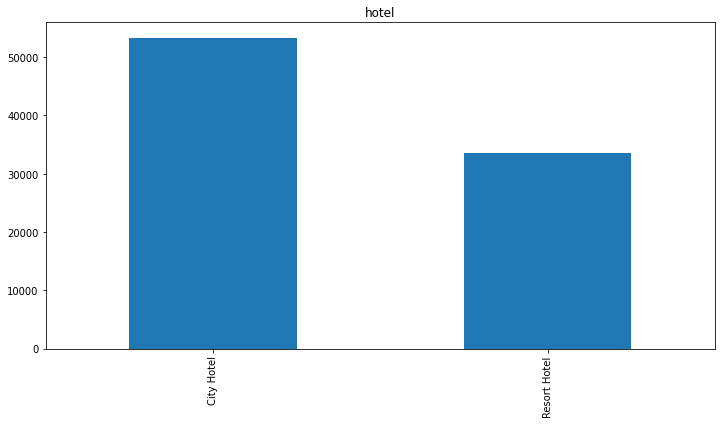

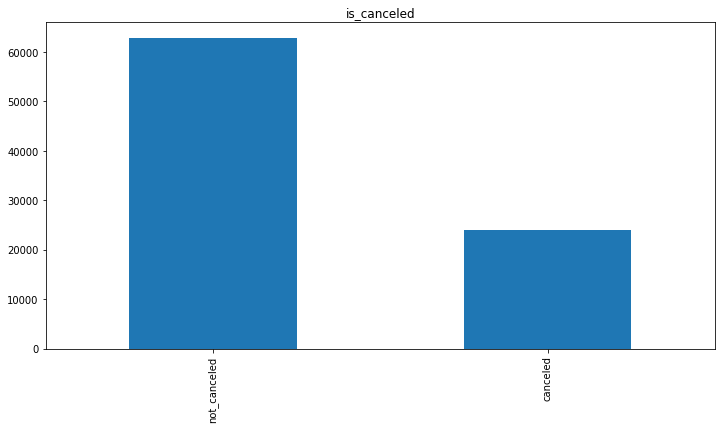

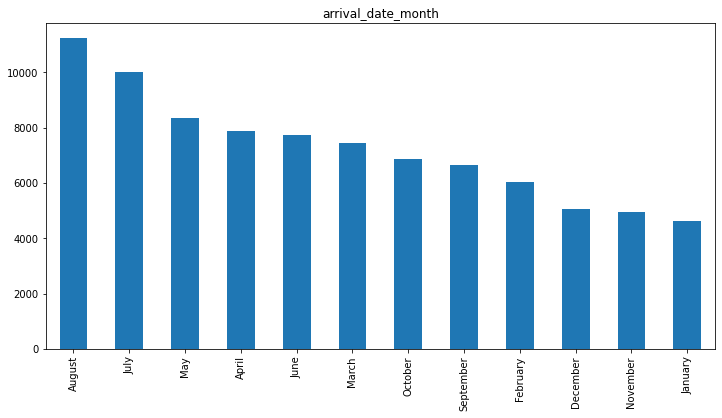

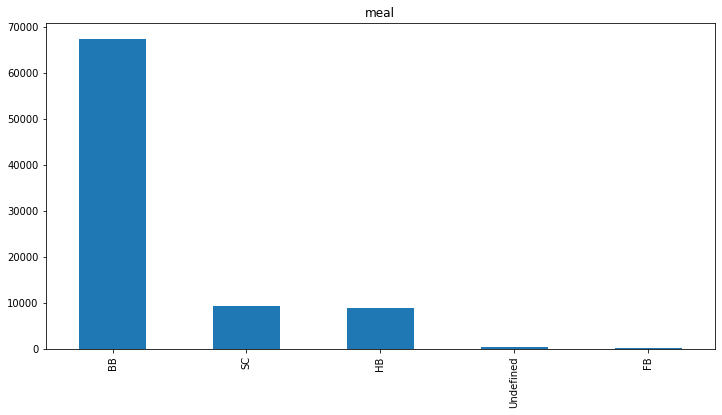

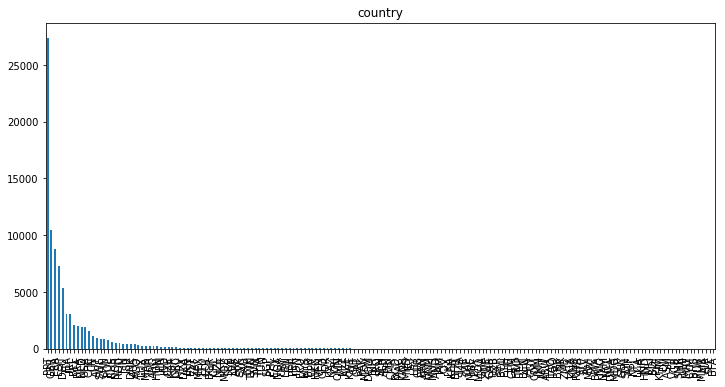

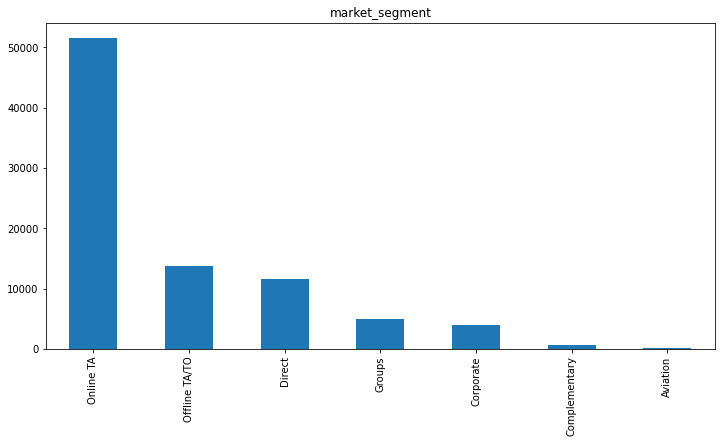

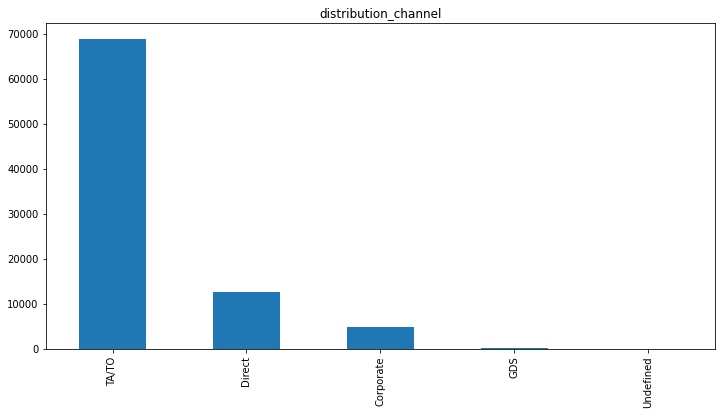

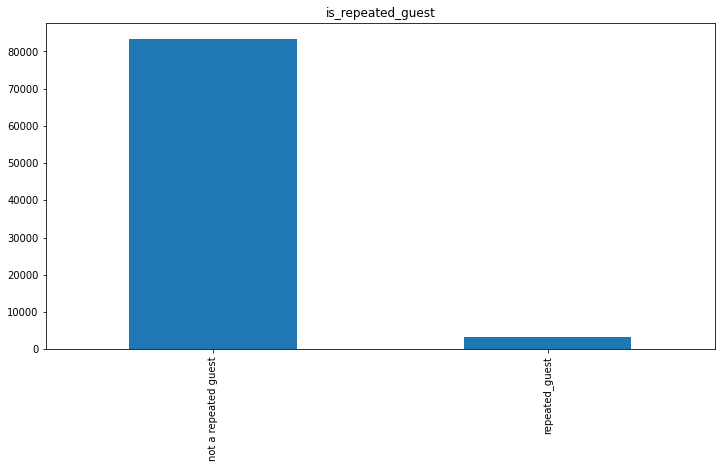

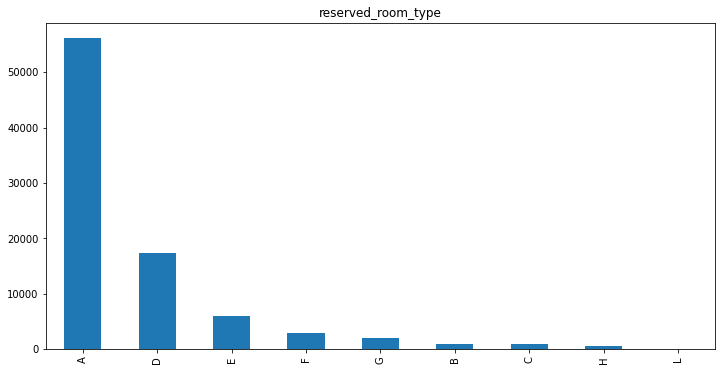

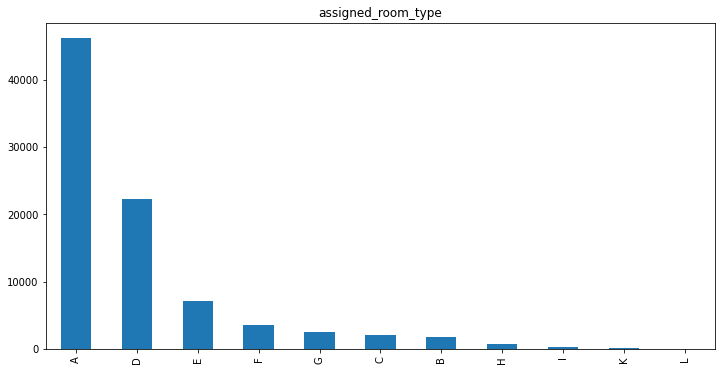

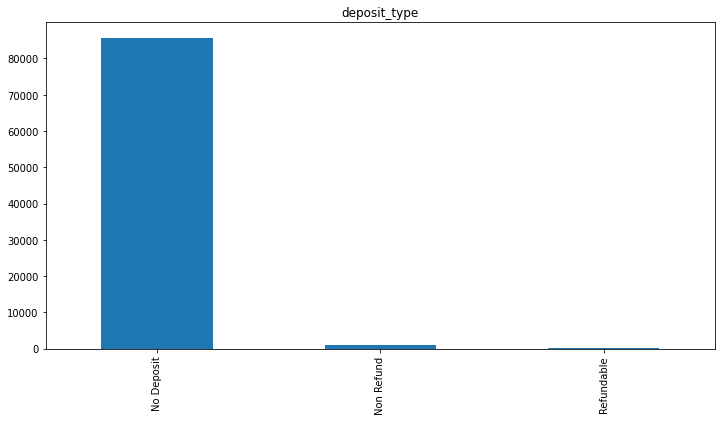

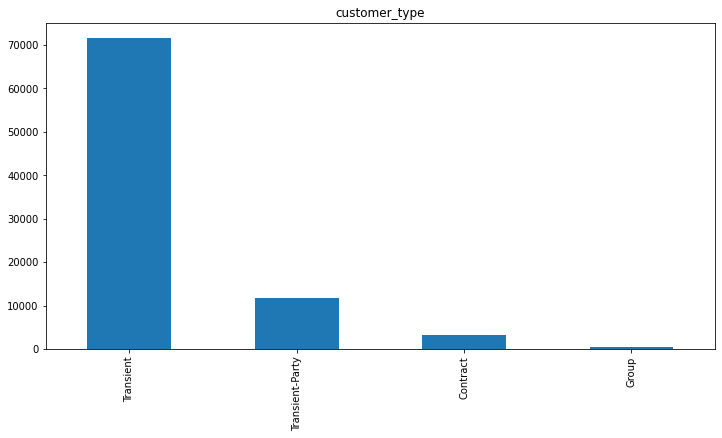

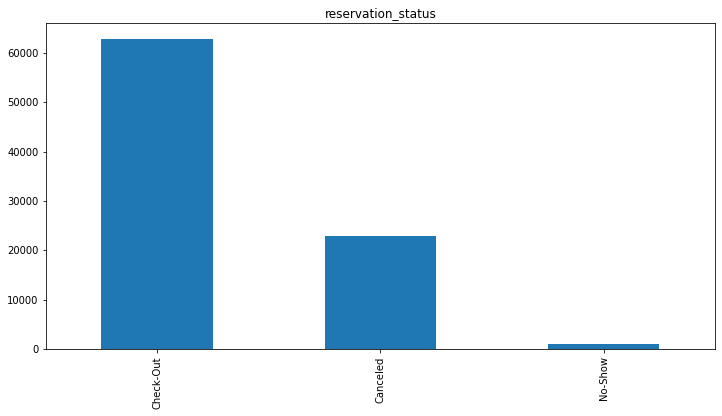

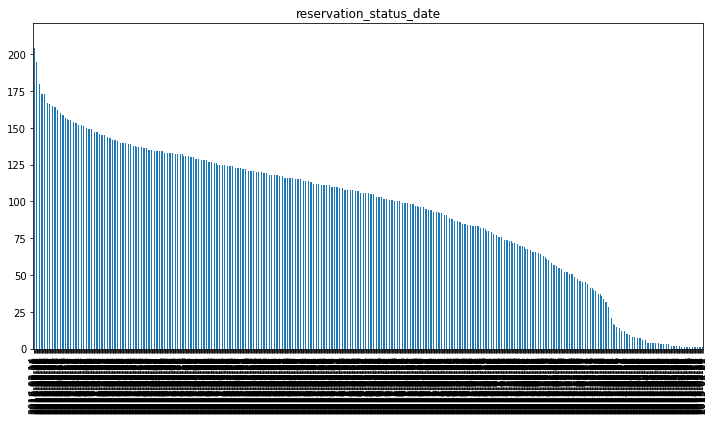

In [32]:
# By same applying for loop on categorical columns I plotted bar plot all all to get insights

for column in categorical_columns:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  df[column].value_counts().plot(kind = 'bar', title=column)

plt.show()

to find the percentage of assigned and booked rooms!

In [33]:
# reserved room type
df.reserved_room_type.value_counts(normalize=True)*100


A    64.614676
D    19.990784
E     6.916254
F     3.240410
G     2.348808
B     1.143877
C     1.051722
H     0.686557
L     0.006912
Name: reserved_room_type, dtype: float64

In [34]:
#assigned rooms
df.assigned_room_type.value_counts(normalize=True)*100


A    53.132128
D    25.649119
E     8.205276
F     4.156203
G     2.859118
C     2.464002
B     2.081557
H     0.808663
I     0.399724
K     0.243060
L     0.001152
Name: assigned_room_type, dtype: float64

In [35]:
# cancallations percentage
df.is_canceled.value_counts(normalize=True)*100

not_canceled    72.381062
canceled        27.618938
Name: is_canceled, dtype: float64

In [36]:
# how distribution channel is distributed accross
df.distribution_channel.value_counts(normalize=True)*100

TA/TO        79.415966
Direct       14.743693
Corporate     5.630688
GDS           0.208501
Undefined     0.001152
Name: distribution_channel, dtype: float64

In [37]:
# prefered type of meal

df.meal.value_counts(normalize=True)*100

BB           77.753715
SC           10.843221
HB           10.426218
Undefined     0.562147
FB            0.414699
Name: meal, dtype: float64

***With univerients we conclude***

1.  66% is City Hotel and 34% is Resort Hotel with Most hotels were booked in year 2016 and least number of hotels were booked in year 2015.

2. Most of the market_segment used is Online TA and Offline TA/TO,Almost half of the bookings are made via Online Travel Agents,some of the bookings are made via Offline Travel Agents and rest are Direct bookings without any other agents.

4. almost distribution_channel is occupied by TA/TO

5. 64% guest book room type A but only 53% is actually assigned the same room

6. Some of the reservations are canceled by the guests

7. Only 4% are repeated guest

8. 77% of the people prefer bed breakfast BB as their meal type during the stay






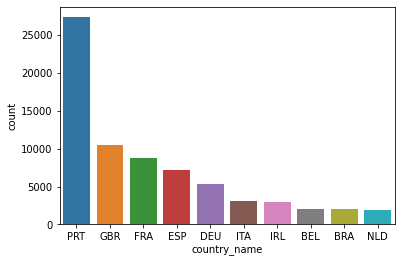

In [39]:
country_bookings = df['country'].value_counts().reset_index(name='count').head(10)

df1= pd.DataFrame(country_bookings)
df1 = df1.rename(columns={'index': 'country_name'})
df1




# lets plot this result
sns.barplot(x=df1['country_name'] , y= df1['count'], data=df)

**Bivarient analysis**

In [38]:

categorical_columns= df.describe(include=['object']).columns
print(categorical_columns)
print(len(categorical_columns))

Index(['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')
14


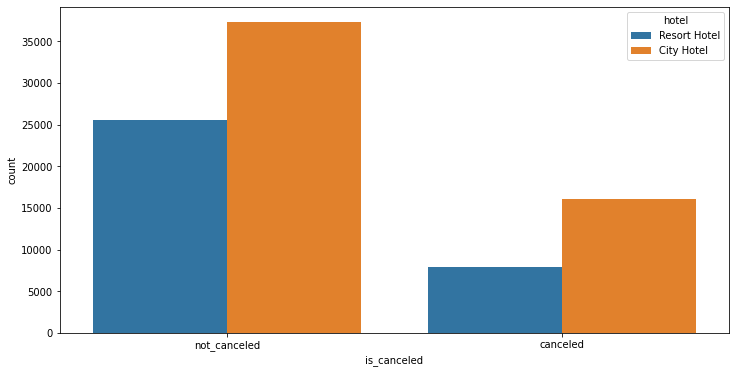

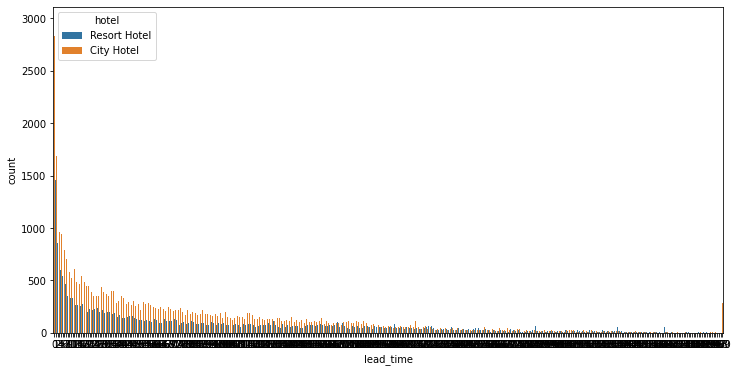

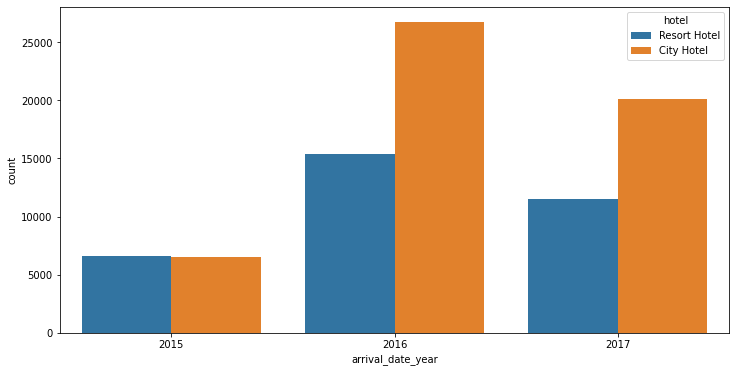

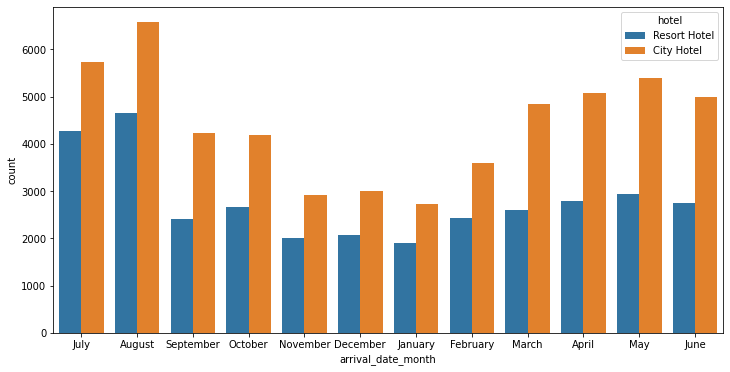

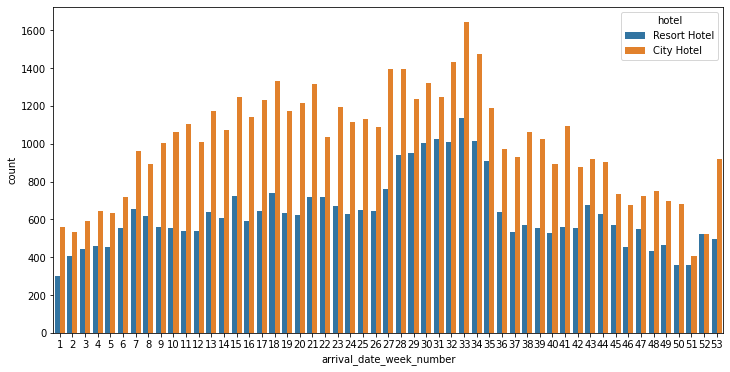

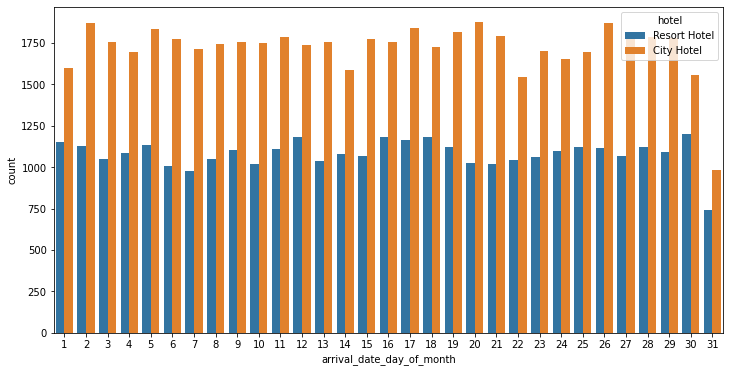

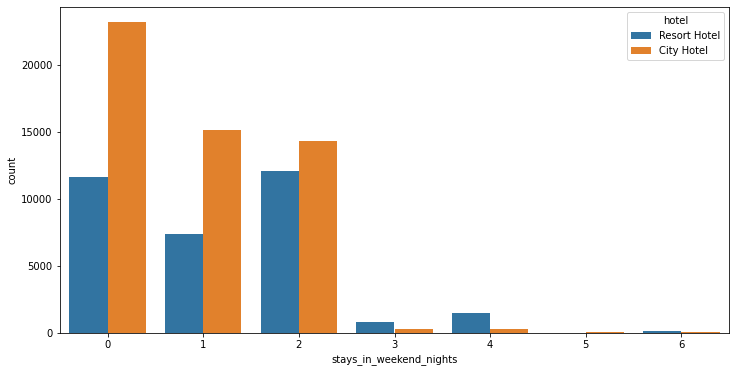

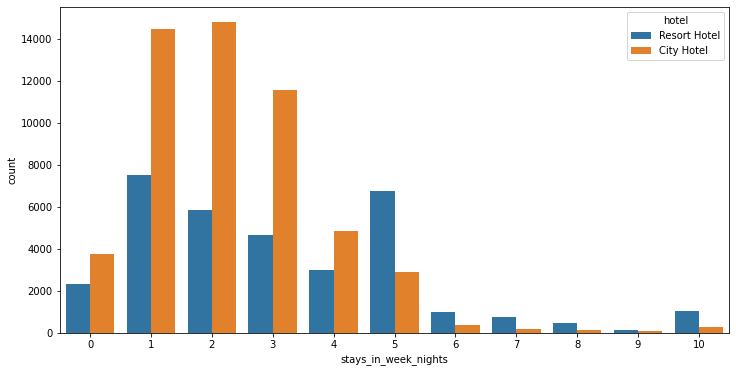

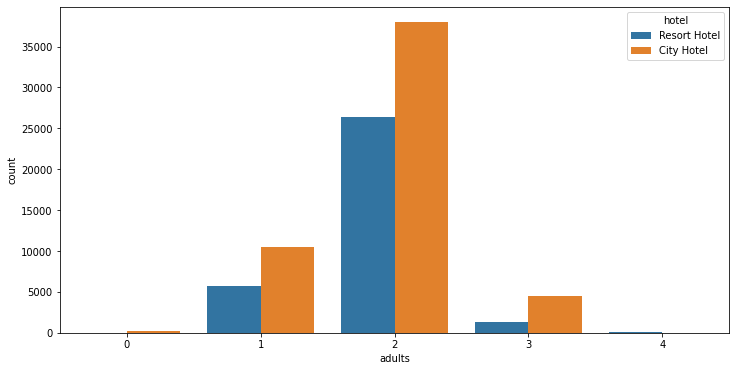

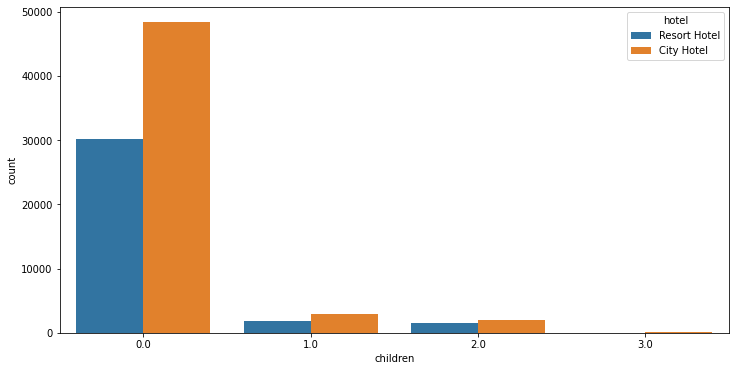

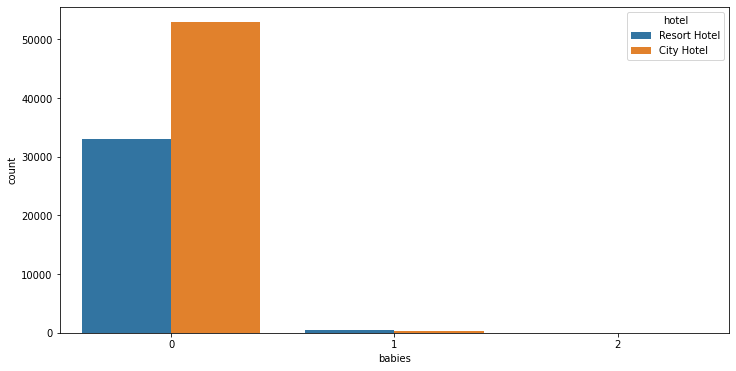

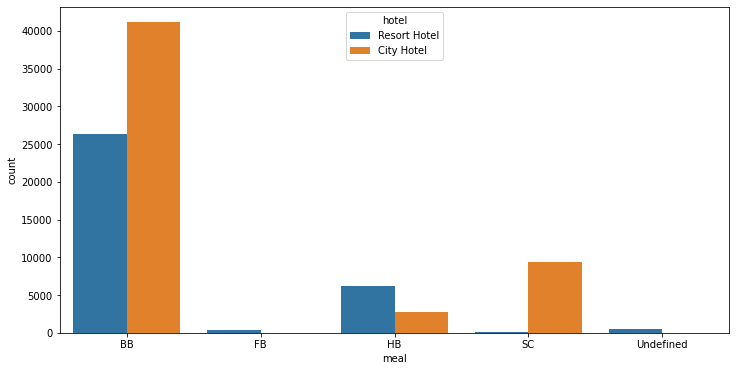

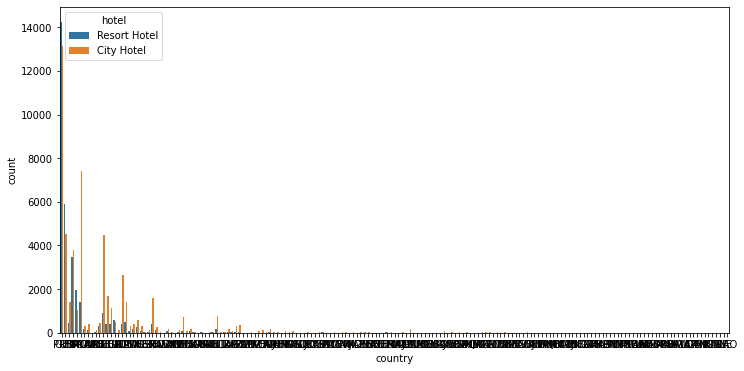

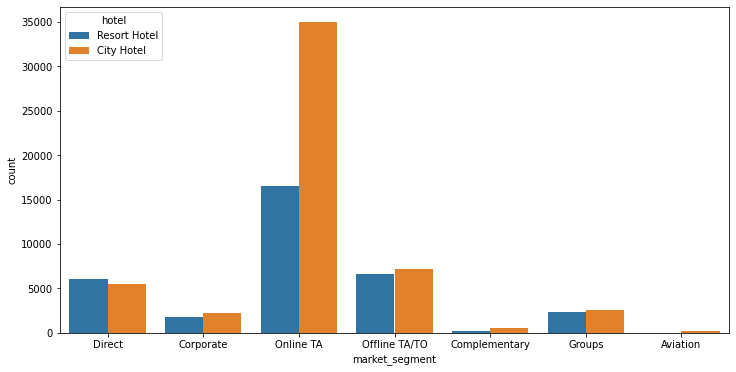

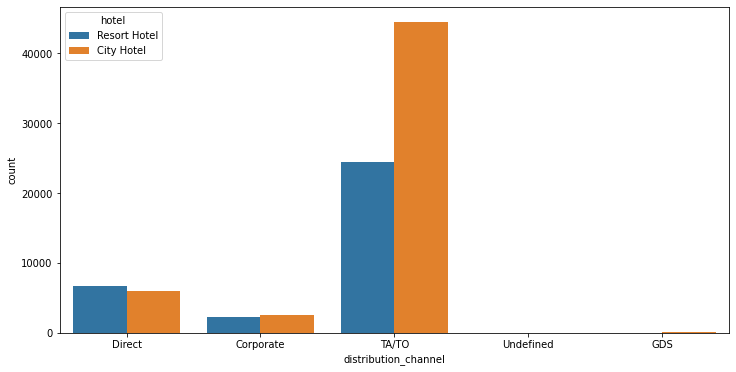

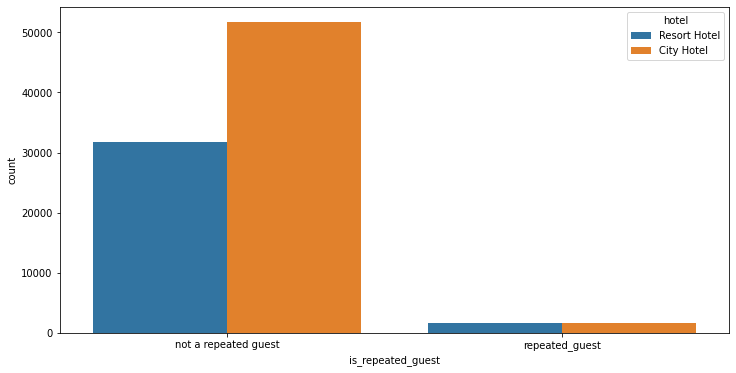

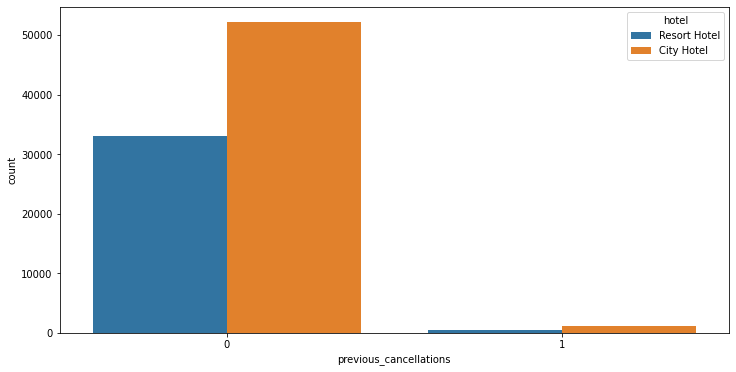

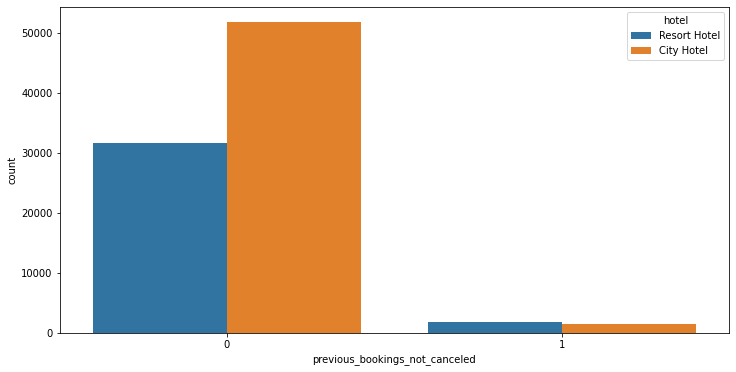

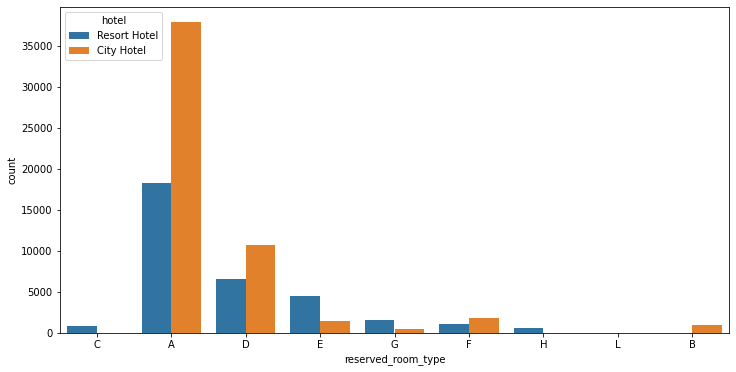

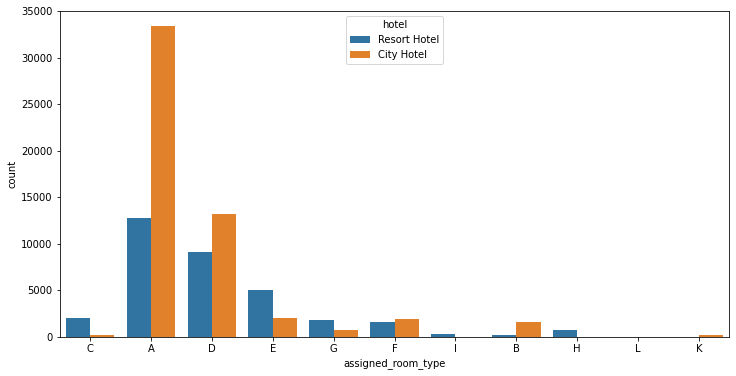

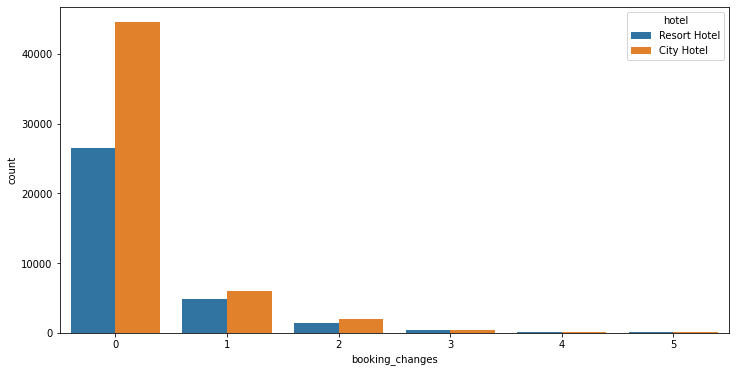

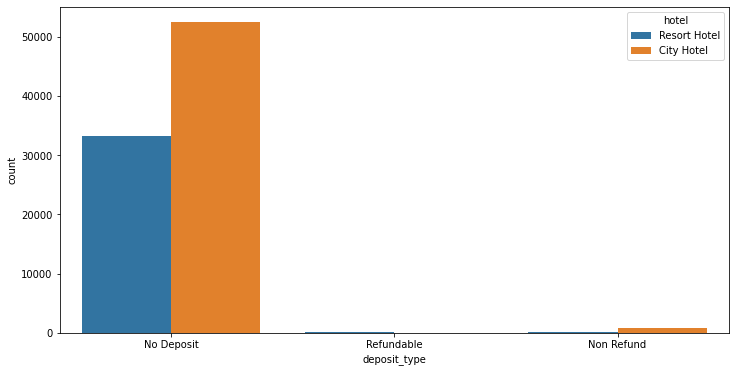

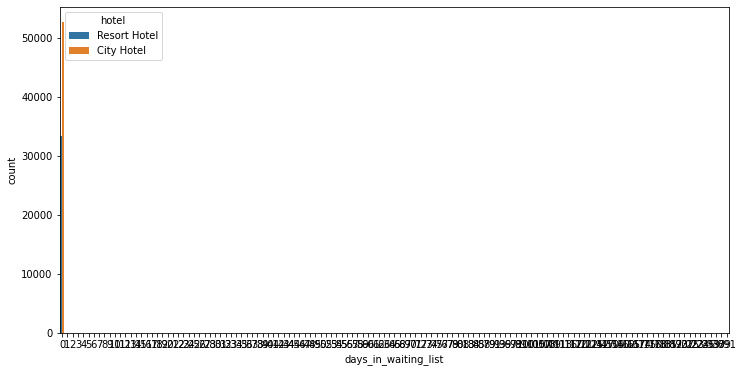

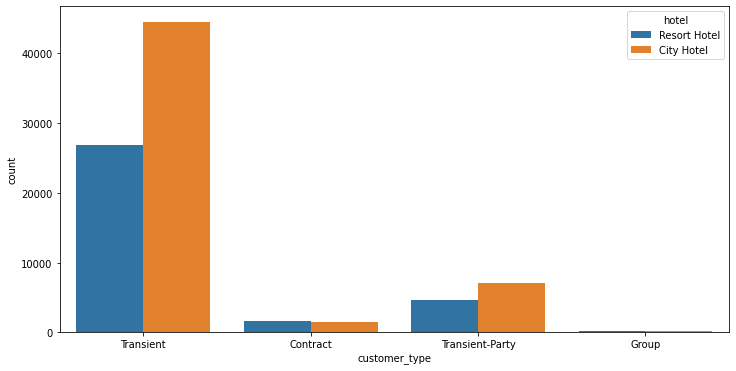

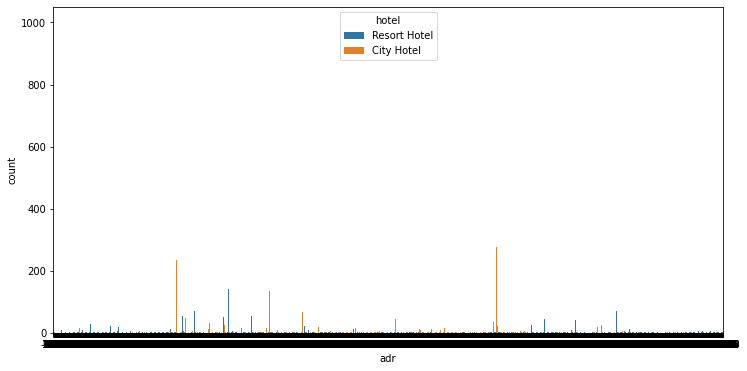

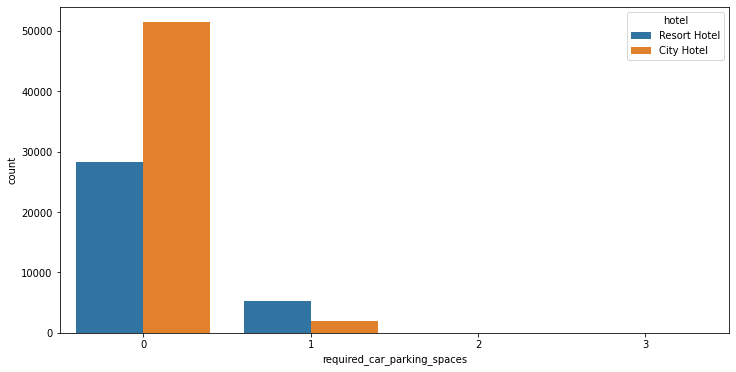

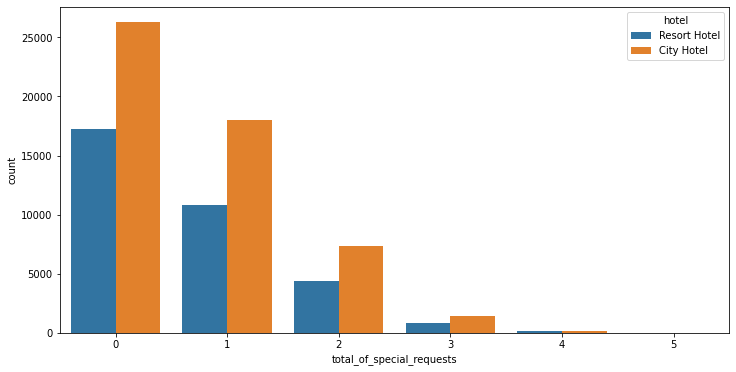

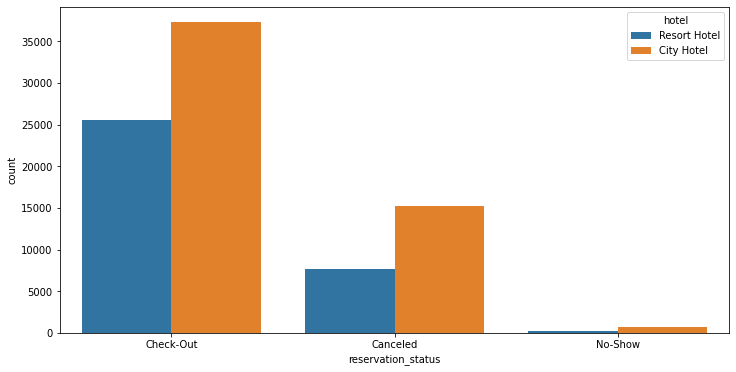

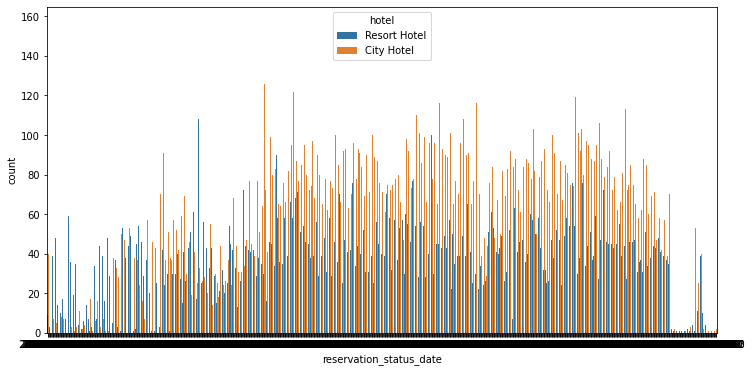

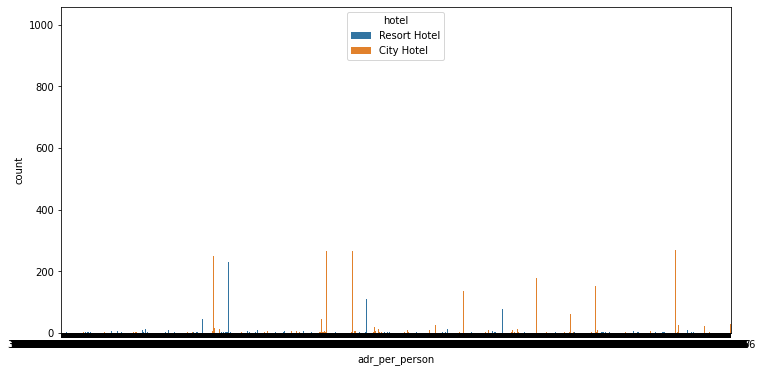

In [40]:
# This loop will print All the columns taking hue as hotel
for column in df.columns[1:]:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  sns.countplot(df[column], x= column, hue=df['hotel'], ax= ax)
plt.show()

**Some insights about bivariates**


1.  From market_segment and distribution_channel we can observe that City Hotel is more into 'Online TA' and Resort Hotel is more into 'Direct' segment.


2. From meal we can observe that City Hotel provide 'BB' and HB and Resort Hotel also provide 'BB', but with BB resort hotels also provide HC

3. High percent of reservations are canceled in city hotel as compared to resort hotel


 **Top 10 countries with maximum bookings**

  country_name  count
0          PRT  27364
1          GBR  10427
2          FRA   8824
3          ESP   7245
4          DEU   5385
5          ITA   3061
6          IRL   3015
7          BEL   2081
8          BRA   1994
9          NLD   1911


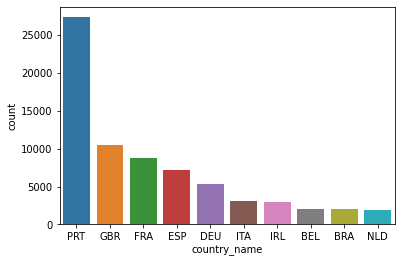

In [41]:
# Country_bookings will give top 10 countries and value_counts will give count and reset index will sort according to highest to lowest

country_bookings = df['country'].value_counts().reset_index(name='count').head(10)

# Here we created dataframe out of variable created above and i will rename the columns as per my convinince

df1= pd.DataFrame(country_bookings)
df1 = df1.rename(columns={'index': 'country_name'})
print(df1)




# lets plot this result
sns.barplot(x=df1['country_name'] , y= df1['count'], data=df)

As graph clearly shows that portugal is the country with maximum bookings of the total bookings made by top 10 countries

**How cancallations vary according to month!**


In [44]:
# Here I groupby two columns to get the individual count of the canceled and not canceled accoridng to month
df.groupby('arrival_date_month')['is_canceled'].value_counts().unstack()

is_canceled,canceled,not_canceled
arrival_date_month,,
April,2402,5463
August,3617,7604
December,1373,3694
February,1412,4619
January,1036,3595
July,3190,6823
June,2352,5394
March,1828,5611
May,2442,5893


Text(0, 0.5, 'count')

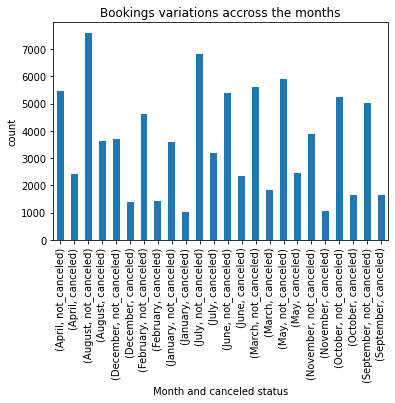

In [46]:
# Here i plotted bar plot Of the Is canceled, arrival month and count 

ax1=df.groupby('arrival_date_month')['is_canceled'].value_counts()
ax1.plot(kind='bar')
plt.title('Bookings variations accross the months')
plt.xlabel('Month and canceled status')
plt.ylabel('count')

**How cancallations vary accroding to hotel type**

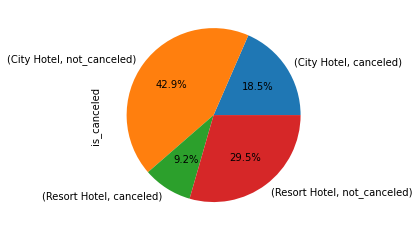

In [47]:
# here we simply groupby two variables with single variable to plot piechart to get clear vision about the hotel type and cacncalations

cancalations_by_month= df.groupby(['hotel','is_canceled'])['is_canceled'].count().plot(kind='pie' , autopct='%1.1f%%')


** How reservation status and market segment is affecting each other**

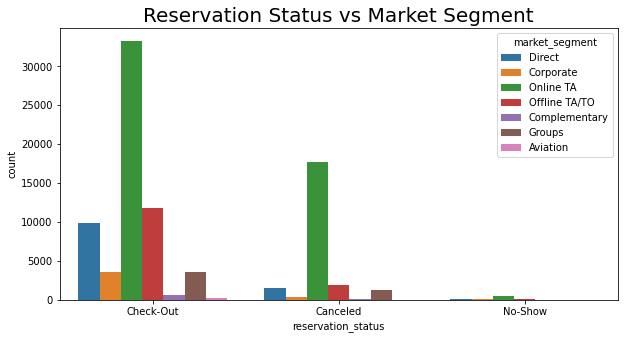

In [48]:
fig= plt.figure(figsize=(10,5))

# Here we are dealing with only two columns ie reservation status and market segment thus our data will be these two columns, where on x axis reservation status and hue market segment
sns.countplot(data= df[['reservation_status', 'market_segment']], x= df['reservation_status'], hue=df['market_segment']).set_title('Reservation Status vs Market Segment', fontsize=20)
plt.show()



1. Max bookings are, either cheak_out status or canceled status and are done by online TA

2. In comparisan with bookings made by online TA and offline TA/TO half of them are canceled, no refunds or some percent charges on cancallation can reduce this issue